# Machine Learning Code

In [2]:
# In order to start we need to Load in some Packages

In [1]:
from packaging import version
import sklearn
import matplotlib.pyplot as plt

from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer  # Import the imputer

In [2]:
# Now, we can load the data set so that we can explore all the features.

In [3]:
# We want to split the data set before we begin. A random sampling will suffice. 

total_set = pd.read_csv("train.csv", nrows = 70000)

In [4]:
total_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                70000 non-null  object 
 1   fare_amount        70000 non-null  float64
 2   pickup_datetime    70000 non-null  object 
 3   pickup_longitude   70000 non-null  float64
 4   pickup_latitude    70000 non-null  float64
 5   dropoff_longitude  70000 non-null  float64
 6   dropoff_latitude   70000 non-null  float64
 7   passenger_count    70000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 4.3+ MB


In [5]:
# Now we spliting the training and test data set

from sklearn.model_selection import train_test_split

taxi_train, taxi_test = train_test_split(total_set, test_size = .2, random_state = 42)


In [6]:
# Now we have to explore the data set

In [7]:
taxi_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
47339,2011-02-23 14:41:00.000000126,6.5,2011-02-23 14:41:00 UTC,-73.976247,40.748368,-73.975468,40.755270,3
67456,2009-02-09 01:29:58.0000001,5.4,2009-02-09 01:29:58 UTC,-74.002251,40.734537,-74.000881,40.742227,1
12308,2011-02-13 18:51:08.0000003,8.5,2011-02-13 18:51:08 UTC,-73.980800,40.769752,-73.979122,40.752011,1
32557,2010-09-30 15:04:22.0000004,10.1,2010-09-30 15:04:22 UTC,-74.008113,40.731087,-73.977977,40.752144,1
664,2014-10-07 15:02:06.0000003,24.5,2014-10-07 15:02:06 UTC,-73.979269,40.761886,-74.002076,40.724702,1


In [8]:
# A better way to get an idea of what is happening in the data set

taxi_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 47339 to 15795
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                56000 non-null  object 
 1   fare_amount        56000 non-null  float64
 2   pickup_datetime    56000 non-null  object 
 3   pickup_longitude   56000 non-null  float64
 4   pickup_latitude    56000 non-null  float64
 5   dropoff_longitude  56000 non-null  float64
 6   dropoff_latitude   56000 non-null  float64
 7   passenger_count    56000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.8+ MB


Text(0.5, 1.0, 'Instances per Fare Amount, in Dollars')

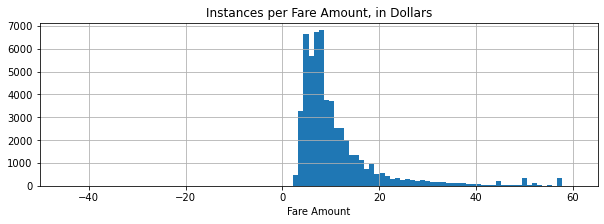

In [9]:
# From the above command we see that we have two object type attributes,
# one integer attribute, and five float type attributes.

# We can have a better understanding of the scales of the different attributes
# By visualizing them

taxi_train[taxi_train.fare_amount <60].fare_amount.hist(bins = 100,
                                                         figsize = (10,3))

plt.xlabel("Fare Amount")
plt.title("Instances per Fare Amount, in Dollars")

In [10]:
# From afar it seems like most of the fare amounts are between 
# 0 and 20 Dollars, this is something that we can take into consideration when scaling 

Text(0.5, 1.0, 'Instances per Passenger Number')

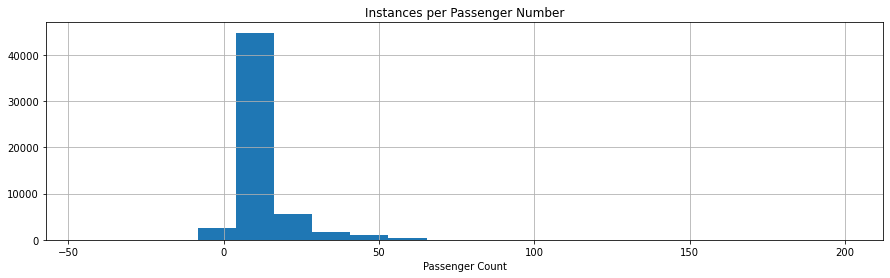

In [11]:
# Lets also take a look at the passenger count

taxi_train[taxi_train.passenger_count <20].fare_amount.hist(bins = 20,
                                                         figsize = (15,4))

plt.xlabel("Passenger Count")
plt.title("Instances per Passenger Number")

In [12]:
# Impute missing values with the mean for Taxi Fare column

taxidf = taxi_train

imputer = SimpleImputer(strategy="mean")

taxi_num = taxidf.select_dtypes(include = [np.number])

imputer.fit(taxi_num)

imputer.transform(taxi_num)

array([[  6.5     , -73.976247,  40.748368, -73.975468,  40.75527 ,
          3.      ],
       [  5.4     , -74.002251,  40.734537, -74.000881,  40.742227,
          1.      ],
       [  8.5     , -73.9808  ,  40.769752, -73.979122,  40.752011,
          1.      ],
       ...,
       [ 24.67    , -73.864515,  40.770517, -73.97892 ,  40.746717,
          1.      ],
       [ 12.1     , -73.987243,  40.72241 , -73.97162 ,  40.76199 ,
          1.      ],
       [ 57.33    , -73.778682,  40.646662, -73.99368 ,  40.752352,
          1.      ]])

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

taxi_num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("standardizer", StandardScaler())
])

# We can apply the same transformation as above using
# a pipeline to make things more efficient

# Note: Have to keep things even between training and test and training

taxitestdf = taxi_test

taxi_num_test = taxitestdf.select_dtypes(include = [np.number])

imputer.fit(taxi_num_test)

imputer.transform(taxi_num_test)

taxi_num_test

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
46730,3.7,-73.994243,40.735303,-73.988808,40.732228,1
48393,9.0,-73.977021,40.733796,-73.974926,40.755554,1
41416,11.5,-73.973595,40.747768,-74.003029,40.734894,5
34506,5.7,-73.982262,40.771324,-73.976965,40.764190,1
43725,5.5,-73.991703,40.729982,-73.984545,40.724933,1
...,...,...,...,...,...,...
21525,6.0,-73.978020,40.749733,-73.986198,40.737587,1
16276,9.3,-73.964857,40.807431,-73.970260,40.784292,1
24390,11.5,-73.980644,40.783176,-73.958687,40.781643,1
28061,18.5,-73.955368,40.714149,-73.983727,40.680401,5


In [14]:
# Display the first few rows of the DataFrame after imputation
print("Imputed Taxi Train Data:")
print(taxi_num.head())

Imputed Taxi Train Data:
       fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
47339          6.5        -73.976247        40.748368         -73.975468   
67456          5.4        -74.002251        40.734537         -74.000881   
12308          8.5        -73.980800        40.769752         -73.979122   
32557         10.1        -74.008113        40.731087         -73.977977   
664           24.5        -73.979269        40.761886         -74.002076   

       dropoff_latitude  passenger_count  
47339         40.755270                3  
67456         40.742227                1  
12308         40.752011                1  
32557         40.752144                1  
664           40.724702                1  


In [15]:
# To get a better look

taxi_num

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
47339,6.50,-73.976247,40.748368,-73.975468,40.755270,3
67456,5.40,-74.002251,40.734537,-74.000881,40.742227,1
12308,8.50,-73.980800,40.769752,-73.979122,40.752011,1
32557,10.10,-74.008113,40.731087,-73.977977,40.752144,1
664,24.50,-73.979269,40.761886,-74.002076,40.724702,1
...,...,...,...,...,...,...
37194,8.10,-73.992161,40.738266,-73.975432,40.754604,1
6265,16.10,-73.971785,40.756499,-74.013319,40.709354,4
54886,24.67,-73.864515,40.770517,-73.978920,40.746717,1
860,12.10,-73.987243,40.722410,-73.971620,40.761990,1


In [16]:
# Display the info of the imputed DataFrame
print("Imputed Taxi Train Info:")
print(taxi_num.info())

Imputed Taxi Train Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 47339 to 15795
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        56000 non-null  float64
 1   pickup_longitude   56000 non-null  float64
 2   pickup_latitude    56000 non-null  float64
 3   dropoff_longitude  56000 non-null  float64
 4   dropoff_latitude   56000 non-null  float64
 5   passenger_count    56000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 3.0 MB
None


In [17]:
# Now that we know that there are no null numbers we can move on to organizing the other columns

In [18]:
# We need to be able to know the distance traveled but we are only given
# longitude and latitude lines. 

# Since we need to calculate distance on a sphere we can use the Haversine Formula

In [19]:
# Apply to DF
import math

def hav_dist(lat1, lon1, lat2, lon2):
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    
    a = (np.sin(dLat / 2) ** 2 + np.sin(dLon / 2) ** 2 * np.cos(lat1) * np.cos(lat2))
    rad = 6371  # Earth's radius in kilometers
    c = 2 * np.arcsin(np.sqrt(a))
    
    distance = rad * c
    return distance



distance = hav_dist(taxi_num['pickup_latitude'], 
                                 taxi_num['pickup_longitude'], 
                                 taxi_num['dropoff_latitude'], 
                                 taxi_num['dropoff_longitude'])

distance

47339     0.770268
67456     0.862844
12308     1.977765
32557     3.453738
664       4.559306
           ...    
37194     2.299236
6265      6.303082
54886     9.992735
860       4.593692
15795    21.601278
Length: 56000, dtype: float64

In [20]:
# Now we should used the function that we created before to create a
# Column that describes the total distance traveled

taxi_train2 = pd.concat([taxi_num, distance], axis = 1)

taxi_train2.rename(columns = {0:"distance"}, inplace = True)

taxi_train2

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
47339,6.50,-73.976247,40.748368,-73.975468,40.755270,3,0.770268
67456,5.40,-74.002251,40.734537,-74.000881,40.742227,1,0.862844
12308,8.50,-73.980800,40.769752,-73.979122,40.752011,1,1.977765
32557,10.10,-74.008113,40.731087,-73.977977,40.752144,1,3.453738
664,24.50,-73.979269,40.761886,-74.002076,40.724702,1,4.559306
...,...,...,...,...,...,...,...
37194,8.10,-73.992161,40.738266,-73.975432,40.754604,1,2.299236
6265,16.10,-73.971785,40.756499,-74.013319,40.709354,4,6.303082
54886,24.67,-73.864515,40.770517,-73.978920,40.746717,1,9.992735
860,12.10,-73.987243,40.722410,-73.971620,40.761990,1,4.593692


In [21]:
# We also would like to know more information about the time that these trips take place
# Currently, they are in a format that is not all that useful to us

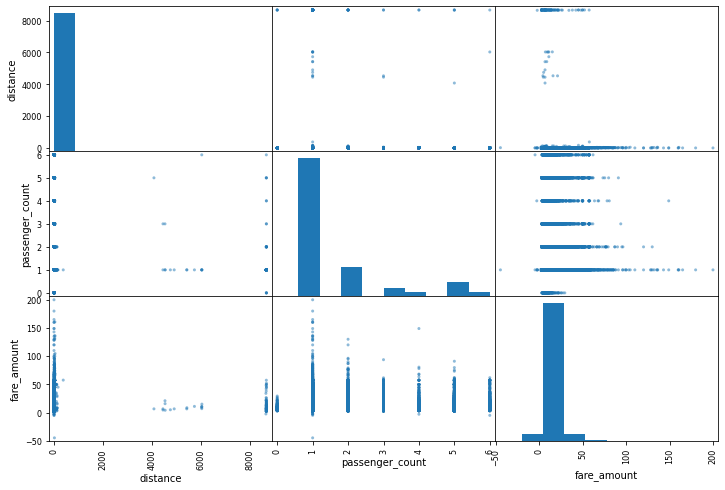

In [22]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

attributes = ["distance", "passenger_count",
              "fare_amount"]
scatter_matrix(taxi_train2[attributes], figsize=(12, 8))
plt.show()

In [23]:
# Based on the look of the scatter matrix it seems like there is some scaling that needs to be done

In [30]:
# Let's also take a look at a correlation matrix

taxi_corr = taxi_train2.corr()

taxi_corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
fare_amount,1.000000,0.006004,-0.006488,0.003169,-0.004039,0.016369,0.017926
pickup_longitude,0.006004,1.000000,-0.922105,0.928593,-0.916791,0.000852,0.117233
pickup_latitude,-0.006488,-0.922105,1.000000,-0.917094,0.937695,-0.003017,-0.122284
dropoff_longitude,0.003169,0.928593,-0.917094,1.000000,-0.979151,0.000778,0.136588
dropoff_latitude,-0.004039,-0.916791,0.937695,-0.979151,1.000000,-0.002906,-0.116552
passenger_count,0.016369,0.000852,-0.003017,0.000778,-0.002906,1.000000,-0.008217
distance,0.017926,0.117233,-0.122284,0.136588,-0.116552,-0.008217,1.000000


In [ ]:
# Stronger Correlations between the distance and fare amount

In [31]:
# Applying the same transformations to the test set

distance_test = hav_dist(taxi_num_test['pickup_latitude'], 
                                 taxi_num_test['pickup_longitude'], 
                                 taxi_num_test['dropoff_latitude'], 
                                 taxi_num_test['dropoff_longitude'])

#distance_test

taxi_test_final = pd.concat([taxi_test, distance_test], axis = 1)

taxi_test_final.rename(columns = {0:"distance"}, inplace = True)

### Working on the Regressors

In [26]:
# Linear Regressor

lr = LinearRegression()

X_train= taxi_train2[["distance"]].values
y_train= taxi_train2[["fare_amount"]].values
X_test= taxi_test2[["distance"]].values
y_test= taxi_test2[["fare_amount"]].values

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error

print("Test RMSE: %.3f" % mean_squared_error( y_test, y_pred) ** 0.5)

Test RMSE: 9.567


In [27]:
# RandomForest Regression

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=200)
rf.fit(X_train, y_train.ravel())
y_pred = rf.predict(X_test)

print("Test RMSE: %.3f" % mean_squared_error( y_test, y_pred) ** 0.5)

Test RMSE: 4.977


## Our Model, of course, can be improved. Here are some of the features that we could not properly impletement but began working on with hopes of improving our model.

In [34]:
# Results appear to be skewed due to the differences in scaling between features

# Dealing with Datetime

taxi_train['pickup_datetime'] = taxi_train2.to_datetime(taxi_train.pickup_datetime)
taxi_test['pickup_datetime'] = taxi_train2.to_datetime(taxi_test.pickup_datetime)


## We want to be able to work with daytime feature in a way that is useful

AttributeError: 'DataFrame' object has no attribute 'to_datetime'

In [10]:
# Failed Version of Haversine Function

import math

def haversine(lat1, lon1, lat2, lon2):

    # Coordinates in decimal degrees (e.g. 2.89078, 12.79797)
    #lon1, lat1 = coord1
    #lon2, lat2 = coord2

    R = 6371000  # radius of Earth in meters
    phi_1 = math.radians(lat1)
    phi_2 = math.radians(lat2)

    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers

    meters = round(meters, 3)
    km = round(km, 3)

    return km

AttributeError: 'Series' object has no attribute 'taxi_train'